In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
customers = pd.read_csv('datasets/Ecommerce_Customers.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [17]:
customers.describe() #only rating heree is pure datatype, therefore plotting only that

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


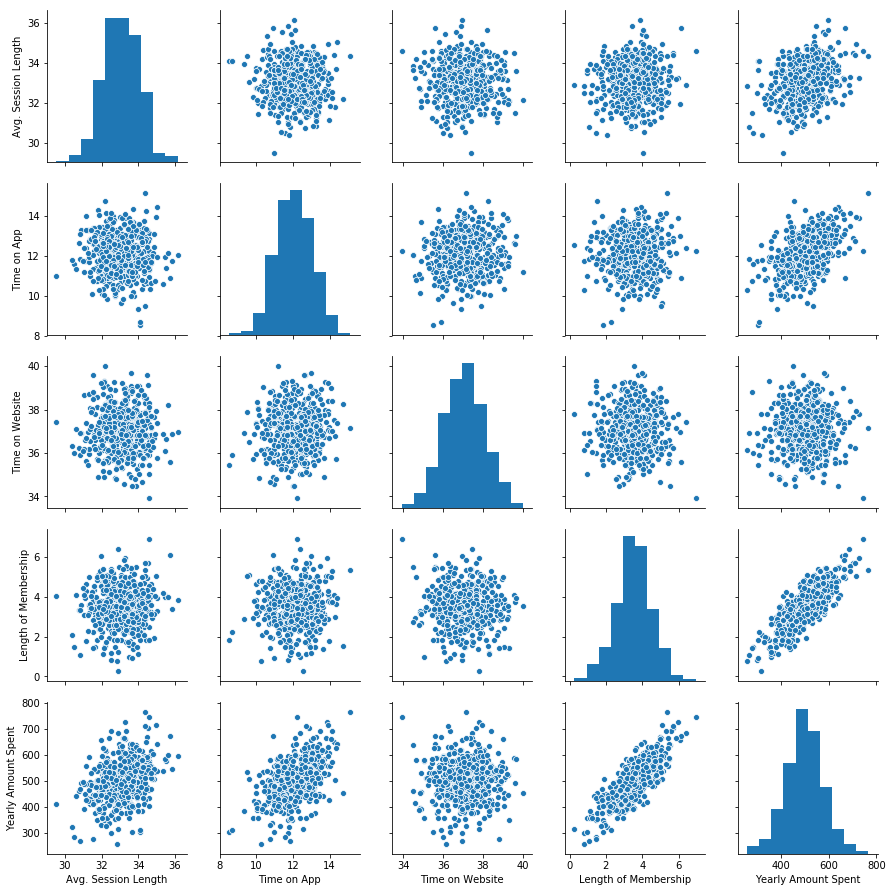

In [18]:
# Let's see seaborn, which can be used to plot relationships betweedn diff columns
sns.pairplot(customers)

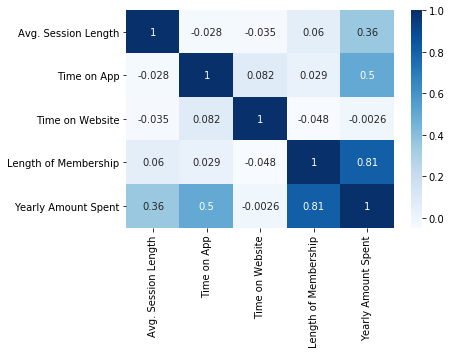

In [19]:
sns.heatmap(customers.corr(),cmap = 'Blues', annot=True) 

## Exploring the Data (EDA : Exploratory Data Analysis)

In [20]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

C:\Users\Saurabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


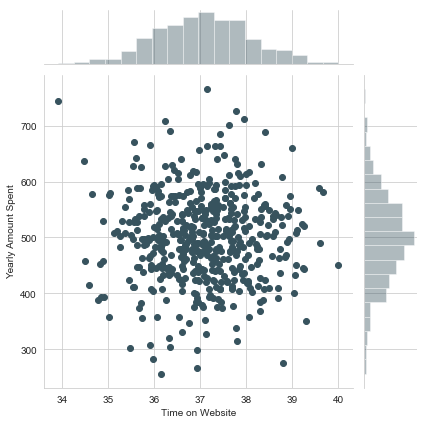

In [21]:
'''Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Soent columns.'''
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

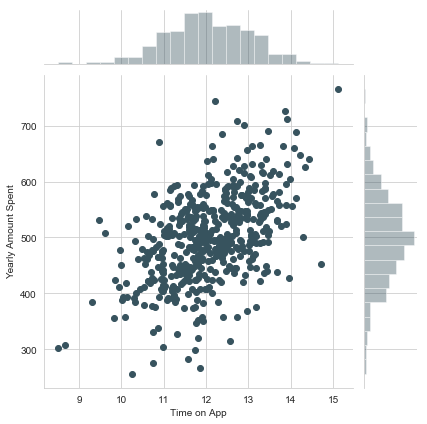

In [22]:
'''Jointplot for the Time on App and Yearly Amount Spent.'''
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers)

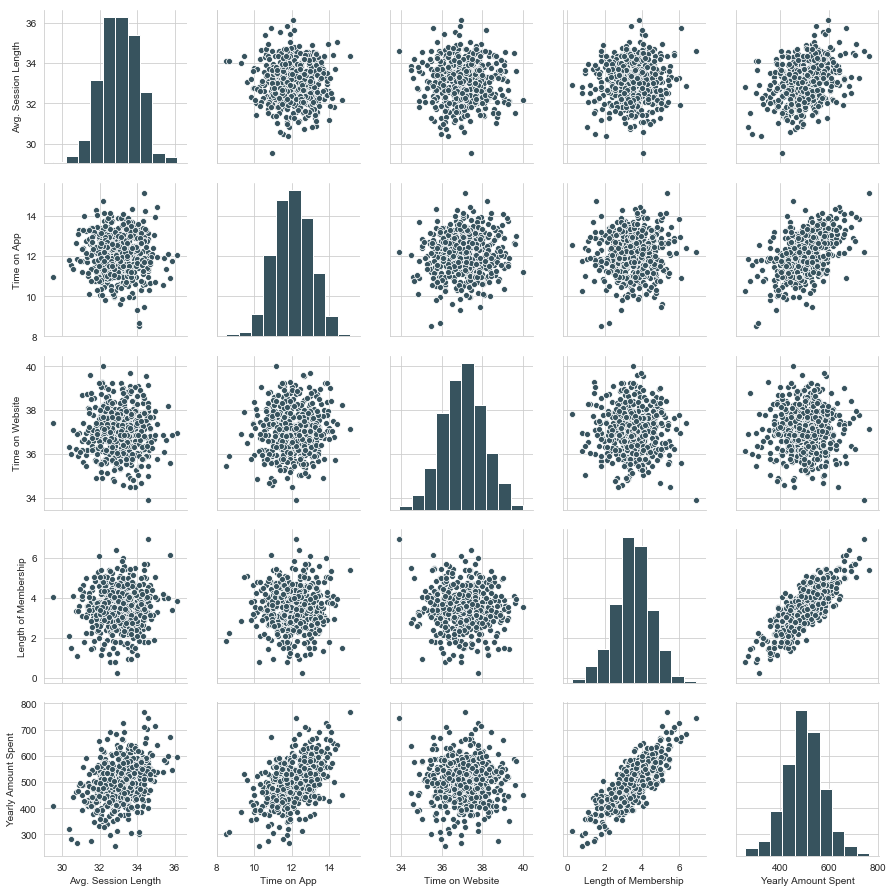

In [23]:
# Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below

sns.pairplot(customers)

In [ ]:
'''
Based on the above plot : 
We can, what looks to be the most correlated feature with the yearly amount spent, is the Length of the Membership, as the 
Length of membership is increasing, it increases the Yearly Amount Spent.
'''

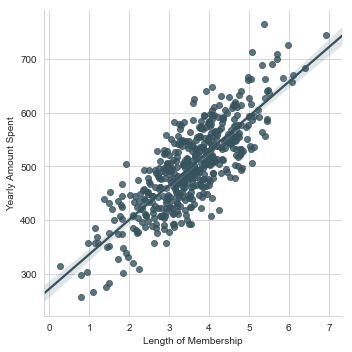

In [24]:
# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customers)

## Training and Tesing Data
Splitting the data into training and testing sets. <br>
X = numerical features of the customers. <br>
y = "Yearly Amount Spent" column.

In [26]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

# " Use model_selection.train_test_split from sklearn to split the data into training and testing sets.
# " Set test_size=0.3 and random_state=101"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # test_size : If float, should be
# between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
# random_state : random number seed in the random()

## Training the Model
Training the model on our training data!

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

#printo ut the coeffienciets of the model
lr.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting the test data
Evaluating the model's performance by predicting off the test values!

Text(0, 0.5, 'Predicted Y')

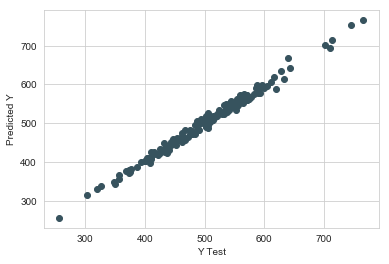

In [32]:
predictions = lr.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model
Evaluating the model's performance by calculating the residual sum of squares and the explained variance score (R^2).

In [34]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 
# Refer to the Wikipedia for the formulas

from sklearn import metrics

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   7.228148653430819
MSE :   79.81305165097427
RMAE :   8.933815066978624


## Residuals

The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e).<br> Each data point has one residual.<br>
Both the sum and the mean of the residuals are equal to zero. That is, Σ e = 0 and e = 0.<br>

                        ** Residual = Observed value - Predicted value **
                        ** e = y - ŷ **
                        
The residual plot shows a fairly random pattern - the first residual is positive, the next two are negative, the fourth is positive, and the last residual is negative. <br>
**This random pattern indicates that a linear model provides a decent fit to the data.**

C:\Users\Saurabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


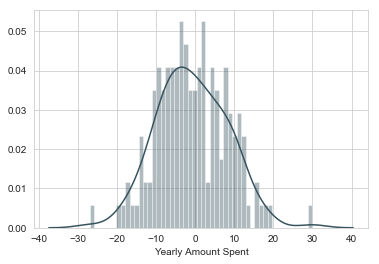

In [35]:
# Let's quickly explore the residuals to make sure everything was okay with our data.
# Plot a histogram of the residuals and make sure it looks normally distributed. 
# Use either seaborn distplot, or just plt.hist().

sns.distplot(y_test - predictions,bins=50)

In [37]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

1. Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
2. Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
3. Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
4. Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

## Conclusion

The company should focus more on their mobile app or on their website?

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company,we would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!